In [4]:
# Connecting to Google Drive and importing relevant libraries

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
import os

In [7]:
# Joining all the different files together into a unified CSV

In [8]:
path = '/content/'

files = [file for file in os.listdir(path) if file.startswith('Sales_') and file.endswith('.csv')]

In [9]:
all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + file)
    all_months_data = pd.concat([all_months_data, current_data])

In [10]:
all_months_data.shape[0]

186850

In [11]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [12]:
df = all_months_data.copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [14]:
# Cleaning the data from empty arrays and investigating how the file is structured

In [15]:
nan_df = df[df.isna().any(axis=1)]

In [16]:
nan_df.head(10)



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
282,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN
1396,NaN,NaN,NaN,NaN,NaN,NaN
1606,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN
2033,NaN,NaN,NaN,NaN,NaN,NaN
2555,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
nan_df.shape[0]

545

In [18]:
df = df.dropna(subset=['Order ID'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [20]:
temp_df = df[df['Order Date'] == 'Order Date']

len(temp_df)

355

In [21]:
df = df[df['Order Date'] != 'Order Date']

In [22]:
temp_df = df[df['Order Date'] == 'Order Date']

len(temp_df)

0

In [23]:
header_check = df[df['Product'] == 'Product']

In [24]:
len(header_check)

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [26]:
# Correct the data type

In [27]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

/tmp/ipython-input-3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [28]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001"


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [31]:
# Splitting the date column into factors for in-depth analysis later

In [32]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Year              185950 non-null  int32         
 7   Month             185950 non-null  int32         
 8   Day               185950 non-null  int32         
 9   Hour              185950 non-null  int32         
 10  Minute            185950 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(5), int64(1), object(3)
memory usage: 13.5+ MB


In [34]:
# Splitting the order address column into elements for in-depth analysis later

In [35]:
def get_city(address):
    return address.split(',')[1].strip()


def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [36]:
df['City'] = df['Purchase Address'].apply(lambda x: get_city(x))
df['State'] = df['Purchase Address'].apply(lambda x: get_state(x))

In [37]:
df['City_State'] = df['City'] + ' (' + df['State'] + ')'

In [38]:
df[['Order Date', 'Year', 'Month', 'Day' ,'Hour', 'City', 'State', 'City_State']].head()

,Order Date,Year,Month,Day,Hour,City,State,City_State
0,2019-10-28 10:56:00,2019,10,28,10,Dallas,TX,Dallas (TX)
1,2019-10-28 17:26:00,2019,10,28,17,Los Angeles,CA,Los Angeles (CA)
2,2019-10-24 17:20:00,2019,10,24,17,New York City,NY,New York City (NY)
3,2019-10-14 22:26:00,2019,10,14,22,New York City,NY,New York City (NY)
4,2019-10-07 16:10:00,2019,10,7,16,Los Angeles,CA,Los Angeles (CA)


In [39]:
# Check whether there are orders that are split into different products.

In [40]:
df.shape[0]


185950

In [41]:
unique_orders = df['Order ID'].nunique()

unique_orders

178437

In [42]:
# Creating a Total column as 'Sales' for future use in analysis

In [43]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

df[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales']].head()

,Order ID,Product,Quantity Ordered,Price Each,Sales
0,259358,34in Ultrawide Monitor,1,379.99,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,389.99
2,259360,AAA Batteries (4-pack),2,2.99,5.98
3,259361,27in FHD Monitor,1,149.99,149.99
4,259362,Wired Headphones,1,11.99,11.99


In [44]:
# Macro information about the data

In [47]:
total_revenue = df['Sales'].sum()

print(total_revenue)

34492035.97


In [48]:
total_orders = df['Order ID'].nunique()

print(total_orders)

178437


In [50]:
total_items_sold = df['Quantity Ordered'].sum()

print(total_items_sold)

209079


In [51]:
avg_order_value = total_revenue / total_orders

print(avg_order_value)

193.30091836334392


In [52]:
num_products = df['Product'].nunique()

print(num_products)

19


In [ ]:
# Macro information Summary

In [55]:
print("=== Executive Summary (2019 Data) ===\n")
print(f"Total Revenue:       ${total_revenue}")
print(f"Total Orders:        {total_orders}")
print(f"Total Items Sold:    {total_items_sold}")
print(f"Average Order Value: ${avg_order_value:.2f}")
print(f"Product Variety:     {num_products} unique items")

=== Executive Summary (2019 Data) ===

Total Revenue:       $34492035.97
Total Orders:        178437
Total Items Sold:    209079
Average Order Value: $193.30
Product Variety:     19 unique items


In [ ]:
# Micro information about the data

In [80]:
Traffic_Drivers = df[['Product', 'Quantity Ordered']]

In [91]:
Traffic_Drivers = Traffic_Drivers.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

In [ ]:
# Top 5 best-selling products

In [117]:
Traffic_Drivers.head()

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557


In [87]:
Money_Makers = df[['Product', 'Quantity Ordered', 'Price Each', 'Sales']]

Money_Makers = Money_Makers.groupby('Product')['Sales'].sum().sort_values(ascending=False)


In [88]:
# Top 5 Revenue Generators

In [118]:
Money_Makers.head()

,Sales
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56


In [162]:
# Because there are not many products (19 total),
# a graph was built that shows a comparison between quantities and total revenue.

In [148]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

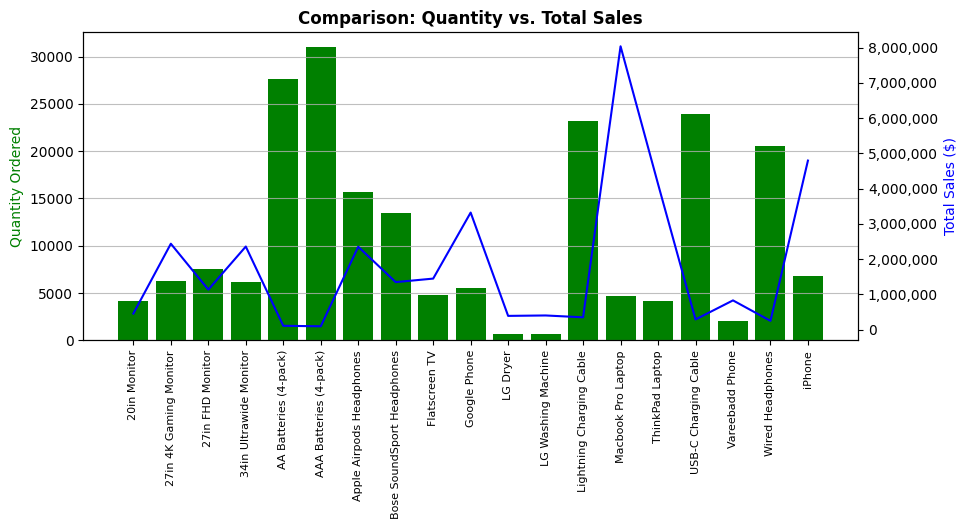

In [168]:

product_group = df.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']
sales = product_group.sum(numeric_only=True)['Sales']
products = quantity_ordered.index

fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.bar(products, quantity_ordered, color='green')
ax1.set_ylabel('Quantity Ordered', color='green')
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical', size=8)

ax2 = ax1.twinx()

ax2.plot(products, sales, color='blue')
ax2.set_ylabel('Total Sales ($)', color='blue')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
ax1.grid(axis='y', alpha=0.8)
plt.title('Comparison: Quantity vs. Total Sales', weight='bold')

fig.show()

In [161]:
# Displaying Sales by Month

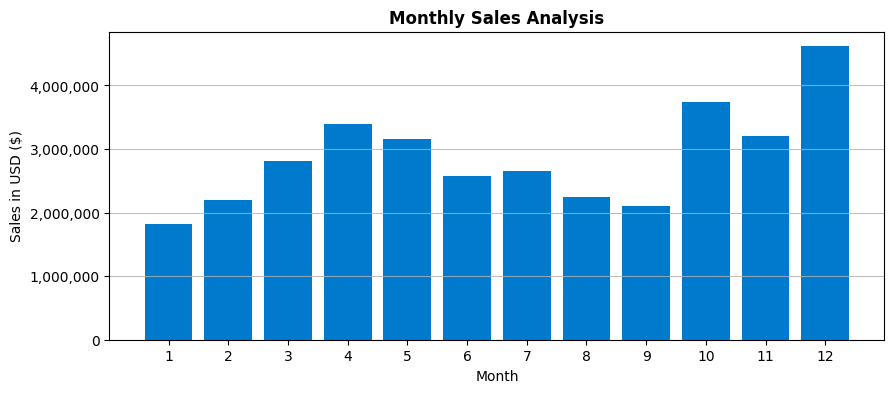

In [171]:
results_month = df.groupby('Month').sum(numeric_only=True)
months = range(1, 13)

plt.figure(figsize=(10, 4))
plt.bar(months, results_month['Sales'], color='#007acc')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.title('Monthly Sales Analysis', weight='bold')
plt.grid(axis='y', alpha=0.8)

plt.show()

In [160]:
# Displaying Total Sales by City

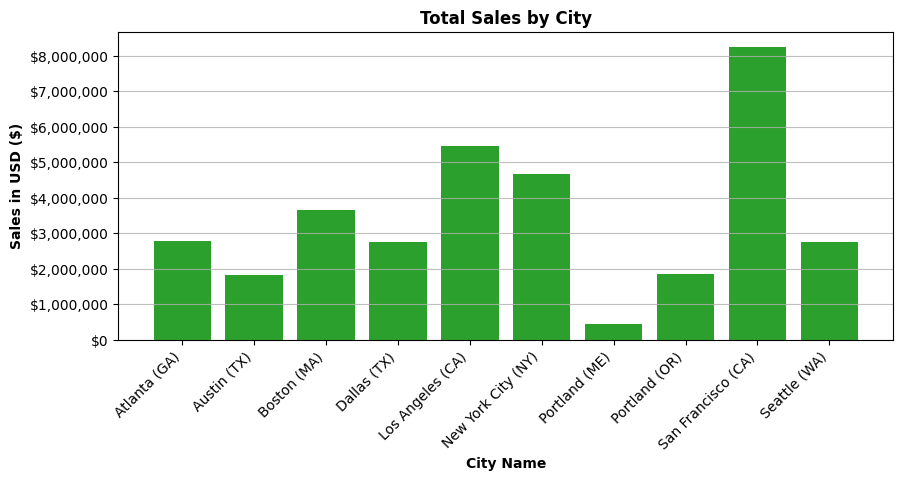

In [170]:

results_city = df.groupby('City_State').sum(numeric_only=True)

cities = [city for city, df in df.groupby('City_State')]

fig, ax = plt.subplots(figsize=(10, 4))

bars = ax.bar(cities, results_city['Sales'], color='#2ca02c')

plt.title('Total Sales by City', weight='bold')
plt.ylabel('Sales in USD ($)', weight='bold')
plt.xlabel('City Name', weight='bold')

plt.xticks(cities, rotation=45, ha='right')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}'))

plt.grid(axis='y', alpha=0.8)

plt.show()

In [159]:
# Displaying Number of Orders by Hour

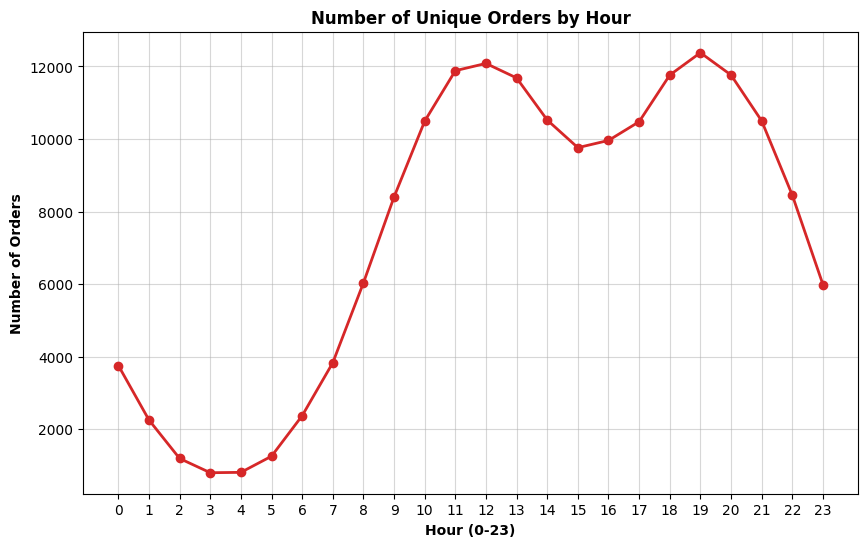

In [199]:
orders_by_hour = df.groupby('Hour')['Order ID'].nunique()

hours = orders_by_hour.index

plt.figure(figsize=(10, 6))

plt.plot(hours, orders_by_hour, color='#d62728', marker='o', linewidth=2)

plt.title('Number of Unique Orders by Hour', weight='bold')
plt.xlabel('Hour (0-23)', weight='bold')
plt.ylabel('Number of Orders', weight='bold')
plt.xticks(hours)
plt.grid(True, alpha=0.5)

plt.show()

In [ ]:
# Market Basket Analysis

In [175]:
from itertools import combinations
from collections import Counter

In [182]:
df_dup = df[df['Order ID'].duplicated(keep=False)]

df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df_dup = df_dup[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()

for row in df_dup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

/tmp/ipython-input-2227231020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [184]:
# Top 10 Most Sold Pairs

In [185]:
for key, value in count.most_common(5):
    print(f"{key}: {value} trades\n")

('iPhone', 'Lightning Charging Cable'): 1005 trades

('Google Phone', 'USB-C Charging Cable'): 987 trades

('iPhone', 'Wired Headphones'): 447 trades

('Google Phone', 'Wired Headphones'): 414 trades

('Vareebadd Phone', 'USB-C Charging Cable'): 361 trades



In [197]:
# Top 5 Most Sold Pairs graph

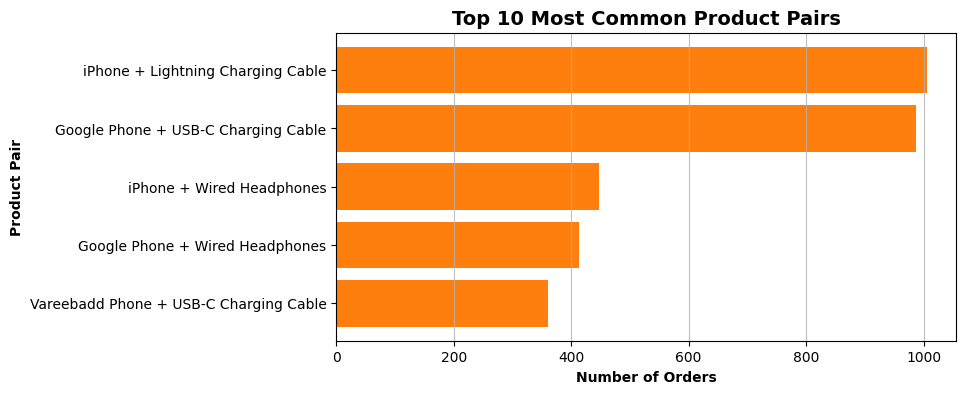

In [196]:

keys = []
values = []

for item, amount in count.most_common(5):
    product_name = f"{item[0]} + {item[1]}"
    keys.append(product_name)
    values.append(amount)

plt.figure(figsize=(8, 4))
plt.barh(keys, values, color='#ff7f0e')

plt.xlabel('Number of Orders', weight='bold')
plt.ylabel('Product Pair', weight='bold')
plt.title('Top 10 Most Common Product Pairs', size=14, weight='bold')

plt.gca().invert_yaxis()

plt.grid(axis='x', alpha=0.8)
plt.show()